In [1]:
# Run in python console
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\charlie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\charlie\Anaconda3\anaconda\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','t','airport','can','termin','s','german','lufthansa','frankfurt','fra','z','taoyuan','taipei','beij','beij capit','lo angel','taiwan','flight','pek','hk','hkg','couldnt','us','two','though','lax','one','didnt',
                   'seem','keep','although','yet','bu','sfo','tbit','air','southwest','tom','howev','go','ever','still','took','must','hotdog','aw',
                  'putt','san','get','tbi','sinc','los','angeles','could','would','be','may','not','sein','fur','rießige','sehr','der','changi','tpe'
                  ,'waw','poland','chopin','warsaw chopin','etiuda','zaventem','brussels zaventem','chisinan','dfw','budap','huf','ferihegy','hungarian','warsaw fryderyk chopin','chisinau'
                  ,'dallas fort worth','stanchion','kobanya','ferenc',"pearson" ,"arlanda" ,"czech airline","copenhagen" ,"lima","csa","sa","cote","sas","stockholm","tsa","terminal","delta","concourse","logan",
                  "mauritius","baku","ssr" ,"south african" ,"johannesburg","cape town","guayaquil","reunion" ,"mauritian","saa"
                  ,"delhi","chinese","china","shenzhen","rupee","sheremetyevo","dme","domodedovo","beij",'✅ Trip Verified | ','Not Verified | ','❎ Unverified | ','❎ Not Verified | ','✅ Verified Review | ','mumbai',
                  'melbourne','sydney','klia','narita','jfk','dubai','singapore','india','cdg','trip verifi','japan','japanese','jakarta'
                  ,'birmingham','lisbon','zurich','vienna','gatwick','heathrow','london','canada','good','emirate','dublin','verified review','amsterdam','auckland','atlanta','hong_kong','munich','brussel'
                  ,'paris','australia','klm','prague','lot','schiphol','bhx','north','south','brisbane','verify','verified','athen','rome','qanta','hong','kong','hong kong',
                  'bkk','bangkok','boston','french','tokyo','dusseldorf','helsinki','barcelona','madrid','brussel','schengen','toronto','vancouver','montreal','indian','perth','australian','nz','new zealand','jetstar','doha'
                  ,'denver','kuala lumpur','europe','moscow','beijing','Beijing','france','usa','american','houston','Emirates','emirates','Hong Kong','New York','New','York','Build','New Zealand','Zealand','Qanta'
                  ,'Kuala Lumpur','Incheon','airline','flight','aircraft','Oslo','Suvarnabhumi','Thailand','Hong','Kong','Haneda','Adelaide','Singapore','Changi','Seoul','Tokyo','Doha','Munich','Centrair','Nagoya'
                  ,'Zurich','Frankfurt','Narita','Amsterdam','Schiphol','Kansai','Osaka','Vancouver','Helsinki','Vantaa','Vienna','Shanghai','Hongqiao'
                   ,'Copenhagen','Sydney','Cape Town','Brisbane','Dubai','Auckland','Hamburg','Durban','King Shaka','Melbourne','Denver','Dusseldorf','Cologne','Bonn','Johannesburg'
                  ,'Beijing','Cincinnati','Northern Kentucky','Haikou','Bangkok','Paris','CDG','Xian','Athens','Gimpo','Toronto','Pearson','Barcelona','Madrid','Barajas','Jakarta','Bogota','Quito'
                  ,'Houston','IAH','Lima','Atlanta','San','Francisco','Christchurch','Abu','Dhabi','Gatwick','Gold','Coast','Dallas','Fort Worth','Lisbon','Stockholm','Arlanda','Perth','Chengdu'
                  ,'Seattle','Tacoma','Mumbai','Bangalore','Baku','Delhi','Montreal','Moscow','Sheremetyevo','JFK','Guayaquil','Porto'
                  ,'Los','Angeles','Bahrain','Moscow','Domodedovo','Hyderabad','Malta','Halifax','New zealand'
                  ,'Minneapolis','Dublin','Sanya','Phoenix','Hanoi','Noi','Bai','Shenzhen','international','oslo',
                  'Rome','Fiumicino','Birmingham','Detroit','Boston','Logan','Budapest','Brussels','Zaventem','European','Brussel'
                  ,'Prague','Raleigh','Durham','Panama','Tocumen','Warsaw','Chopin','Medina','Mauritius','Nice','Houston','Hobby','Fukuoka','bad','Korean','Canadian','Qantas','Thai','Swiss',"European's",'flights','badly','nicer',"New Zealand's",'quickly','quick'
                  ,'non-european','Canadians','nice','nicely','New Yorker','make','makes','extremely','Extremely','lot','lots','Airport','airports','year','years','fly','flying','flyers','Fly','BA','bit','back'
                  ,'day','days'"New York's",'Pre','Bad','Badly','Good','goods','Airlines','airlines','euro','thing','things','european','Kuala','Lumpur','thai','Canadians','IAH'])

In [4]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
import os
os.chdir('C:/Users/charlie/Documents/3Y_Airport')
docss = []
for filename in os.listdir(os.getcwd()):
    out = open(filename, encoding = 'utf8')
    docss.append([out.read()])
    out.close()

In [5]:
data = []
for i in docss:
    for e in i:
        data.append(e)

In [6]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

In [7]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

C:\Users\charlie\Anaconda3\anaconda\lib\site-packages\gensim\models\phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [8]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [9]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [10]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [11]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

C:\Users\charlie\Anaconda3\anaconda\lib\site-packages\gensim\models\ldamodel.py:804: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


In [12]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.000*"security" + 0.000*"gate" + 0.000*"staff" + 0.000*"time" + '
  '0.000*"check" + 0.000*"long" + 0.000*"hour" + 0.000*"wait" + 0.000*"minute" '
  '+ 0.000*"trip"'),
 (1,
  '0.001*"mosque" + 0.001*"cafetaria" + 0.001*"medina" + 0.001*"umrah" + '
  '0.001*"steelwork" + 0.001*"mishap" + 0.001*"jeddah" + 0.000*"palm" + '
  '0.000*"staff" + 0.000*"time"'),
 (2,
  '0.014*"security" + 0.013*"time" + 0.012*"staff" + 0.011*"check" + '
  '0.010*"hour" + 0.010*"gate" + 0.009*"queue" + 0.009*"people" + 0.008*"line" '
  '+ 0.008*"wait"'),
 (3,
  '0.002*"shenzen" + 0.001*"upward" + 0.001*"chengdu" + 0.001*"infected" + '
  '0.001*"linyi" + 0.000*"time" + 0.000*"security" + 0.000*"staff" + '
  '0.000*"hour" + 0.000*"gate"'),
 (4,
  '0.000*"security" + 0.000*"time" + 0.000*"staff" + 0.000*"check" + '
  '0.000*"gate" + 0.000*"hour" + 0.000*"wait" + 0.000*"experience" + '
  '0.000*"trip" + 0.000*"long"'),
 (5,
  '0.003*"rdu" + 0.002*"raleigh" + 0.001*"durham" + 0.001*"inviting" + '
  '0.001*"

In [13]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.327196241346127

Coherence Score:  0.32735623035024397


In [14]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\charlie\Anaconda3\anaconda\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.349874  0.029549       1        1  75.734550
14     0.351052 -0.002318       2        1  23.443369
15     0.028741 -0.131078       3        1   0.449715
19    -0.070106  0.039671       4        1   0.179021
13    -0.056778  0.014935       5        1   0.081762
7     -0.053579  0.013525       6        1   0.076502
16    -0.040113  0.003614       7        1   0.007994
5     -0.040173  0.003184       8        1   0.006109
17    -0.039503  0.002835       9        1   0.003917
10    -0.039426  0.002490      10        1   0.003887
1     -0.039643  0.002501      11        1   0.003518
3     -0.039284  0.002735      12        1   0.003234
18    -0.038763  0.002319      13        1   0.000810
11    -0.038880  0.002292      14        1   0.000806
6     -0.038881  0.002292      15        1   0.000806
4     -0.038874  0.002297      16        1   0.000802
8     -0.038902  0.002294      17        1   0.000801
0     -0.038850  0.002304      18        1   0.000800
12    -0.038976  0.002275      19        1   0.000799
9     -0.038935  0.002284      20        1   0.000797, topic_info=     Category         Freq              Term        Total  loglift  logprob
576   Default  2789.000000              gate  2789.000000  30.0000  30.0000
238   Default   960.000000             clean   960.000000  29.0000  29.0000
1316  Default  3585.000000             staff  3585.000000  28.0000  28.0000
221   Default  2964.000000             check  2964.000000  27.0000  27.0000
1094  Default  2579.000000             queue  2579.000000  26.0000  26.0000
75    Default  1638.000000              area  1638.000000  25.0000  25.0000
541   Default   941.000000              food   941.000000  24.0000  24.0000
786   Default  2061.000000              long  2061.000000  23.0000  23.0000
1408  Default  3650.000000              time  3650.000000  22.0000  22.0000
425   Default   583.000000              easy   583.000000  21.0000  21.0000
771   Default  1903.000000              line  1903.000000  20.0000  20.0000
1506  Default  1120.000000              walk  1120.000000  19.0000  19.0000
855   Default  1996.000000            minute  1996.000000  18.0000  18.0000
81    Default  1792.000000            arrive  1792.000000  17.0000  17.0000
1166  Default  1575.000000            review  1575.000000  16.0000  16.0000
1416  Default   679.000000            toilet   679.000000  15.0000  15.0000
1205  Default  3672.000000          security  3672.000000  14.0000  14.0000
1237  Default  1151.000000              shop  1151.000000  13.0000  13.0000
362   Default  1484.000000         departure  1484.000000  12.0000  12.0000
1505  Default  2306.000000              wait  2306.000000  11.0000  11.0000
792   Default   769.000000            lounge   769.000000  10.0000  10.0000
479   Default  1845.000000        experience  1845.000000   9.0000   9.0000
1446  Default  1449.000000              trip  1449.000000   8.0000   8.0000
460   Default  1337.000000              even  1337.000000   7.0000   7.0000
982   Default  1895.000000         passenger  1895.000000   6.0000   6.0000
524   Default  1417.000000              find  1417.000000   5.0000   5.0000
46    Default   958.000000              also   958.000000   4.0000   4.0000
647   Default  2464.000000              hour  2464.000000   3.0000   3.0000
80    Default  1244.000000           arrival  1244.000000   2.0000   2.0000
1200  Default   734.000000              seat   734.000000   1.0000   1.0000
...       ...          ...               ...          ...      ...      ...
1408  Topic20     0.000204              time  3650.936768  -4.9583  -9.3307
1316  Topic20     0.000204             staff  3585.905273  -4.9443  -9.3347
221   Topic20     0.000204             check  2964.382080  -4.7543  -9.3350
1205  Topic20     0.000203          security  3672.524170  -4.9691  -9.3356
576   Topic20     0.000203       

In [15]:
import os
from gensim.models.wrappers import LdaMallet

os.environ.update({'MALLET_HOME':r'C:/new_mallet/mallet-2.0.8/'})
mallet_path = 'C:/new_mallet/mallet-2.0.8/bin/mallet' # update this path

ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=25, id2word=id2word)

result=(ldamallet.show_topics(num_topics=25,num_words=10,formatted=False))
for each in result:
    print(each) 

(0, [('time', 0.06607581607581607), ('bus', 0.037557037557037556), ('check', 0.036504036504036504), ('minute', 0.028694278694278694), ('plane', 0.02263952263952264), ('luggage', 0.022025272025272026), ('leave', 0.019743769743769745), ('delay', 0.01833976833976834), ('hour', 0.016058266058266057), ('train', 0.015795015795015795)])
(1, [('immigration', 0.07741420590582601), ('hour', 0.040930338615893284), ('staff', 0.03830806065442937), ('arrive', 0.034887698095998176), ('queue', 0.03192338387869114), ('time', 0.025652719188233954), ('custom', 0.023942537909018357), ('wait', 0.023714513738456275), ('officer', 0.0223463687150838), ('clear', 0.017443849047999088)])
(2, [('line', 0.04088397790055249), ('check', 0.026104972375690608), ('trip', 0.02527624309392265), ('terminal', 0.02334254143646409), ('agent', 0.022651933701657457), ('passport', 0.020303867403314916), ('stand', 0.019751381215469613), ('work', 0.019751381215469613), ('officer', 0.01919889502762431), ('huge', 0.0131215469613259

In [16]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(22,
  [('security', 0.04438984438984439),
   ('check', 0.03882063882063882),
   ('area', 0.031122031122031123),
   ('small', 0.026535626535626536),
   ('time', 0.02620802620802621),
   ('gate', 0.022113022113022112),
   ('seat', 0.020802620802620804),
   ('travel', 0.017526617526617525),
   ('shop', 0.017035217035217036),
   ('luggage', 0.016871416871416873)]),
 (10,
  [('transit', 0.09286783042394015),
   ('gate', 0.04458852867830424),
   ('review', 0.03211970074812968),
   ('transfer', 0.02743142144638404),
   ('wifi', 0.022643391521197008),
   ('hour', 0.022344139650872816),
   ('service', 0.020249376558603493),
   ('give', 0.019850374064837906),
   ('passenger', 0.018553615960099752),
   ('short', 0.015760598503740647)]),
 (18,
  [('line', 0.06557958170861397),
   ('people', 0.04466501240694789),
   ('long', 0.03792981212336051),
   ('wait', 0.031549096065225095),
   ('passenger', 0.02729528535980149),
   ('area', 0.021269053527118043),
   ('decent', 0.014711095356256646),
   ('c

In [17]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [18]:
import time

start = time.time()

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=25, step=3)


end = time.time()
elapsed = end - start
print("Time taken: ", elapsed, "seconds.")

Time taken:  674.7063608169556 seconds.


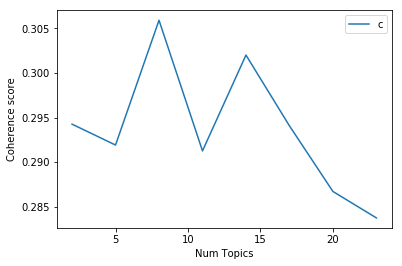

In [19]:
# Show graph
limit=25; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2943
Num Topics = 5  has Coherence Value of 0.2919
Num Topics = 8  has Coherence Value of 0.3059
Num Topics = 11  has Coherence Value of 0.2913
Num Topics = 14  has Coherence Value of 0.302
Num Topics = 17  has Coherence Value of 0.2941
Num Topics = 20  has Coherence Value of 0.2867
Num Topics = 23  has Coherence Value of 0.2837


In [21]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.033*"people" + 0.024*"time" + 0.023*"travel" + 0.022*"wait" + '
  '0.020*"staff" + 0.019*"security" + 0.015*"experience" + 0.013*"bag" + '
  '0.013*"long" + 0.013*"luggage"'),
 (1,
  '0.026*"area" + 0.018*"walk" + 0.017*"passenger" + 0.015*"baggage" + '
  '0.014*"arrival" + 0.013*"departure" + 0.012*"seat" + 0.011*"custom" + '
  '0.011*"minute" + 0.010*"domestic"'),
 (2,
  '0.035*"staff" + 0.035*"queue" + 0.025*"arrive" + 0.020*"hour" + '
  '0.017*"time" + 0.017*"wait" + 0.016*"minute" + 0.012*"find" + '
  '0.012*"passenger" + 0.012*"arrival"'),
 (3,
  '0.037*"gate" + 0.025*"staff" + 0.019*"hour" + 0.017*"find" + '
  '0.016*"transit" + 0.014*"experience" + 0.014*"board" + 0.013*"bus" + '
  '0.012*"transfer" + 0.010*"people"'),
 (4,
  '0.054*"immigration" + 0.027*"check" + 0.025*"time" + 0.023*"staff" + '
  '0.020*"hour" + 0.019*"counter" + 0.018*"transit" + 0.016*"queue" + '
  '0.016*"long" + 0.015*"passenger"'),
 (5,
  '0.058*"line" + 0.028*"hour" + 0.021*"check" + 0.021*"ti

In [22]:
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.033*"people" + 0.024*"time" + 0.023*"travel" + 0.022*"wait" + '
  '0.020*"staff" + 0.019*"security" + 0.015*"experience" + 0.013*"bag" + '
  '0.013*"long" + 0.013*"luggage" + 0.012*"make" + 0.012*"review" + '
  '0.011*"gate" + 0.010*"queue" + 0.009*"rude" + 0.009*"bad" + 0.008*"place" + '
  '0.008*"customer" + 0.007*"work" + 0.007*"problem"'),
 (1,
  '0.026*"area" + 0.018*"walk" + 0.017*"passenger" + 0.015*"baggage" + '
  '0.014*"arrival" + 0.013*"departure" + 0.012*"seat" + 0.011*"custom" + '
  '0.011*"minute" + 0.010*"domestic" + 0.010*"parking" + 0.009*"exit" + '
  '0.009*"arrive" + 0.009*"pick" + 0.009*"long" + 0.008*"food" + 0.008*"place" '
  '+ 0.008*"hall" + 0.007*"pay" + 0.007*"poor"'),
 (2,
  '0.035*"staff" + 0.035*"queue" + 0.025*"arrive" + 0.020*"hour" + '
  '0.017*"time" + 0.017*"wait" + 0.016*"minute" + 0.012*"find" + '
  '0.012*"passenger" + 0.012*"arrival" + 0.011*"departure" + 0.011*"delay" + '
  '0.011*"return" + 0.011*"bag" + 0.010*"desk" + 0.009*"experience

In [23]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=30))

[(0,
  '0.033*"people" + 0.024*"time" + 0.023*"travel" + 0.022*"wait" + '
  '0.020*"staff" + 0.019*"security" + 0.015*"experience" + 0.013*"long" + '
  '0.013*"bag" + 0.013*"luggage" + 0.012*"make" + 0.012*"review" + '
  '0.011*"gate" + 0.010*"queue" + 0.009*"rude" + 0.009*"bad" + 0.008*"place" + '
  '0.008*"customer" + 0.007*"work" + 0.007*"country" + 0.007*"miss" + '
  '0.007*"problem" + 0.007*"plane" + 0.007*"leave" + 0.007*"put" + '
  '0.006*"depart" + 0.006*"happen" + 0.006*"stand" + 0.006*"min" + '
  '0.006*"signage"'),
 (1,
  '0.026*"area" + 0.018*"walk" + 0.017*"passenger" + 0.015*"baggage" + '
  '0.014*"arrival" + 0.013*"departure" + 0.012*"seat" + 0.011*"custom" + '
  '0.011*"minute" + 0.010*"domestic" + 0.010*"parking" + 0.009*"exit" + '
  '0.009*"arrive" + 0.009*"pick" + 0.009*"long" + 0.008*"food" + 0.008*"place" '
  '+ 0.008*"hall" + 0.007*"pay" + 0.007*"poor" + 0.007*"sit" + 0.007*"number" '
  '+ 0.006*"carousel" + 0.006*"dirty" + 0.006*"world" + 0.006*"bag" + '
  '0.006

In [ ]:
import csv
for i in range(len(docss)):
    print(optimal_model[corpus[i]])
    with open("conference.csv",'a') as t:
        tr=csv.writer(t, dialect="excel")
        tr.writerows(optimal_model[corpus[i]])

In [24]:
print(a)

NameError: name 'a' is not defined

In [ ]:
pprint(ldamallet.show_topics(num_topics=20,num_words=8,formatted=False))

In [ ]:
print(a)

In [ ]:
import pandas as pd

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

In [ ]:
df_dominant_topic.head(100)

In [ ]:
df_dominant_topic.head(100).to_excel('df_dominant_topic.xlsx',sheet_name='sheet1')

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics